In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random


In [24]:
# Parameters
learning_rate = 0.005
training_epochs = 1000
display_step = 100

In [20]:
# Training Data
train_X = numpy.asarray([1,2,5,4,6,7,8])
train_Y = numpy.asarray([1,3,4,3,2,5,2])
n_samples = train_X.shape[0]




In [14]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [15]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [16]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [17]:
# Initializing the variables
init = tf.global_variables_initializer()

Epoch: 0100 cost= 0.802228272 W= 0.384835 b= 0.783192
Epoch: 0200 cost= 0.777890265 W= 0.366421 b= 0.892838
Epoch: 0300 cost= 0.757938564 W= 0.349737 b= 0.992183
Epoch: 0400 cost= 0.741584897 W= 0.33462 b= 1.08219
Epoch: 0500 cost= 0.728182375 W= 0.320924 b= 1.16375
Epoch: 0600 cost= 0.717200816 W= 0.308514 b= 1.23764
Epoch: 0700 cost= 0.708204567 W= 0.29727 b= 1.30459
Epoch: 0800 cost= 0.700836301 W= 0.287083 b= 1.36525
Epoch: 0900 cost= 0.694802821 W= 0.277853 b= 1.42021
Epoch: 1000 cost= 0.689863682 W= 0.26949 b= 1.47001
Optimization Finished!
Training cost= 0.689864 W= 0.26949 b= 1.47001 



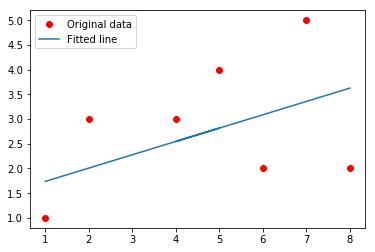

In [25]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()